# Assignment 1

Cifar-10 classification with Convolutional Neural Networks

We were given a sample CNN notebook for MNIST (recognizing numbers) which we had to adapt for Cifar-10 (categorizing 10 different image classes). Minimal acceptable target was 75% validation accuracy while ideal target was 82% or above. We managed to hit above 85% in our final model which we deemed to be as good as it possibly could get.

Importing necessary libraries.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

I0000 00:00:1762112597.382637   33042 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1762112597.408928   33042 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1762112598.072397   33042 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Input image size is 32x32 pixels with 3 colour RGB channels yielding total of 3072 units for our input layer.

In [3]:
# Cifar-10 images have 10 distinct classes, image input in 32x32x3
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


First convolutional block consists of 32 filters, second of 64 filters, both 3x3 pixels each. The input is flattened from 3 dimensions to just 1 so that it can be fed into the model. Finally 50% of neurons are dropped during the training in order to help the model generalize into non-trainset data.

In [4]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

W0000 00:00:1762112131.720372   19915 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1762112131.723837   19915 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1762112131.821958   19915 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12676 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


In [5]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Model is compiled using Categorical Crossentropy as loss function and Adam as optimizer.

In [6]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


I0000 00:00:1762112134.391073   20096 service.cc:158] XLA service 0x794a6c030f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762112134.391109   20096 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1762112134.403439   20096 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762112134.481692   20096 cuda_dnn.cc:463] Loaded cuDNN version 91002


   83/11250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.0979 - loss: 2.3178

I0000 00:00:1762112135.844373   20096 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4610 - loss: 1.5006 - val_accuracy: 0.5712 - val_loss: 1.2353
Epoch 2/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5599 - loss: 1.2473 - val_accuracy: 0.6208 - val_loss: 1.0877
Epoch 3/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5872 - loss: 1.1768 - val_accuracy: 0.6420 - val_loss: 1.0300
Epoch 4/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6058 - loss: 1.1338 - val_accuracy: 0.6518 - val_loss: 1.0101
Epoch 5/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6192 - loss: 1.0932 - val_accuracy: 0.6702 - val_loss: 0.9529


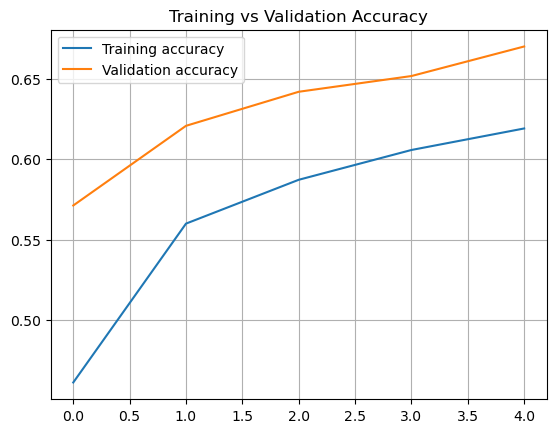

In [7]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

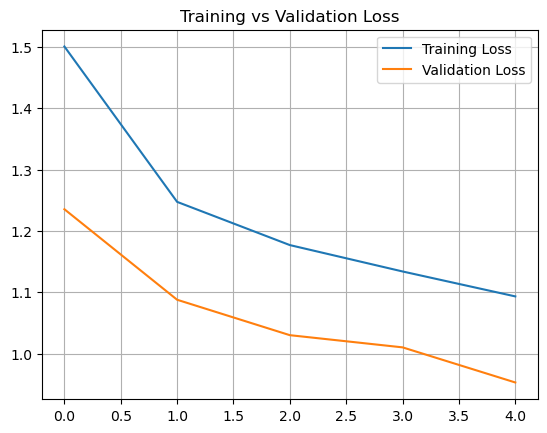

In [8]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

Results of the CNN model before introducing custom layers.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.9873920679092407
Test accuracy: 0.6542999744415283
Final training accuracy: 0.6191555261611938
Final training loss: 1.0931888818740845
Final validation accuracy: 0.670199990272522
Final validation loss: 0.9528845548629761


Sample outputs of images.

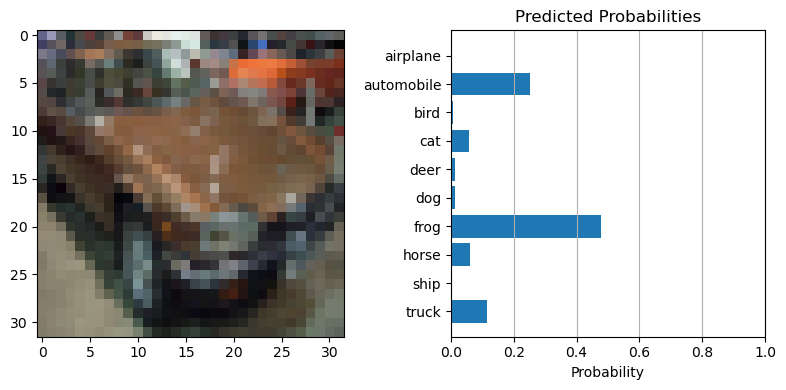

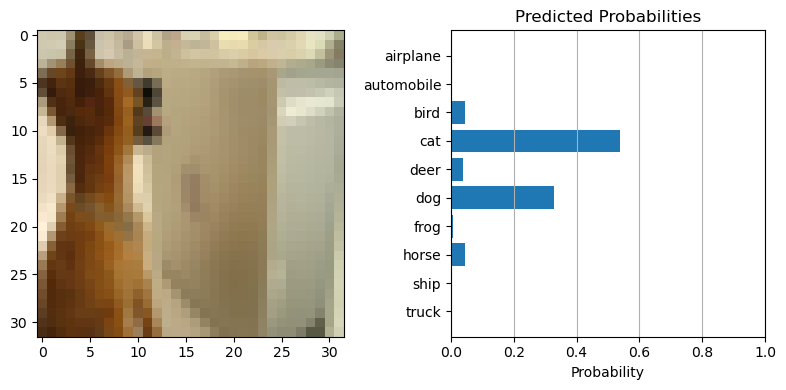

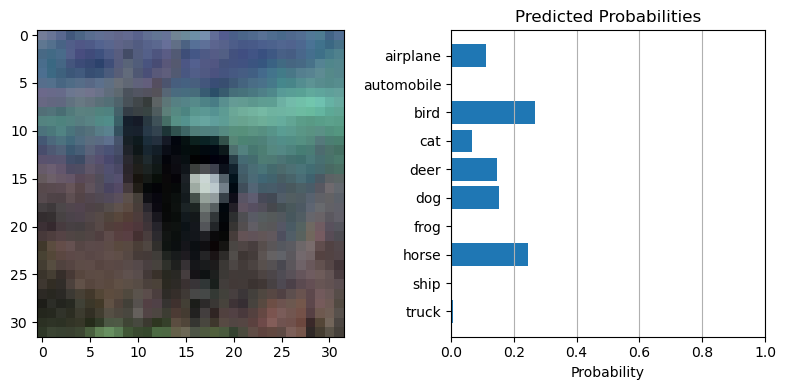

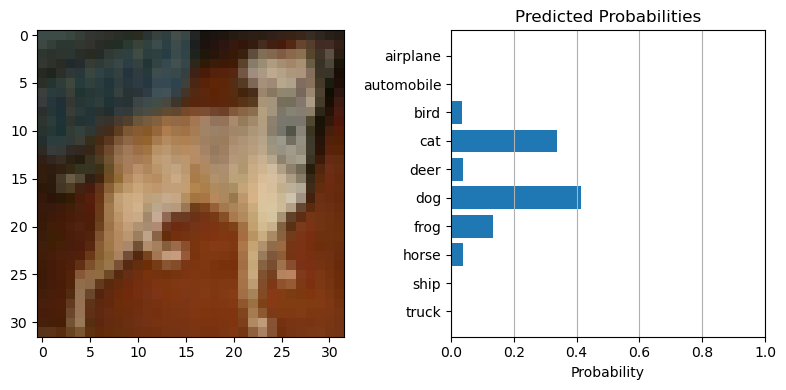

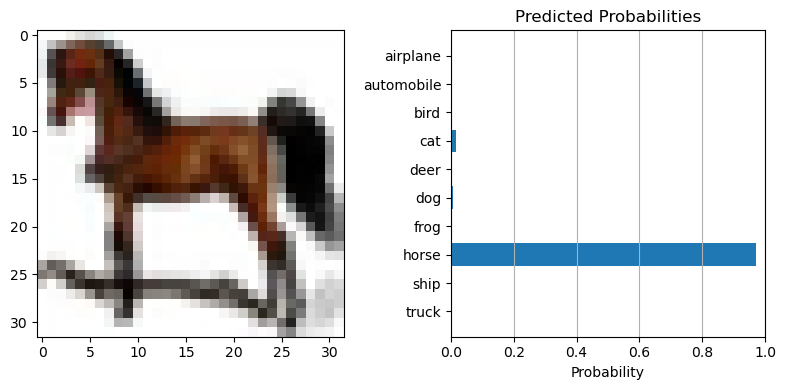

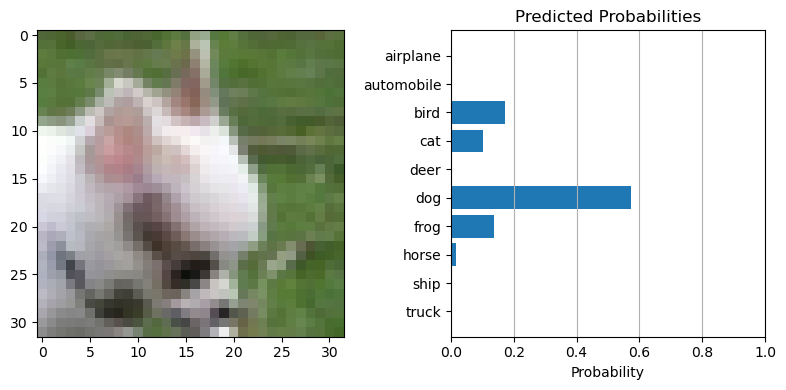

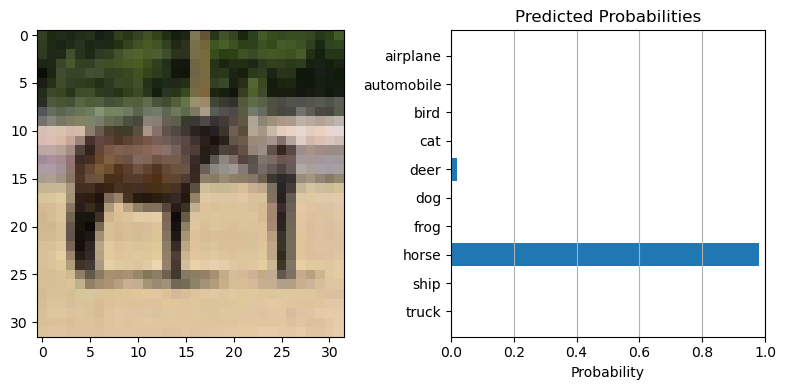

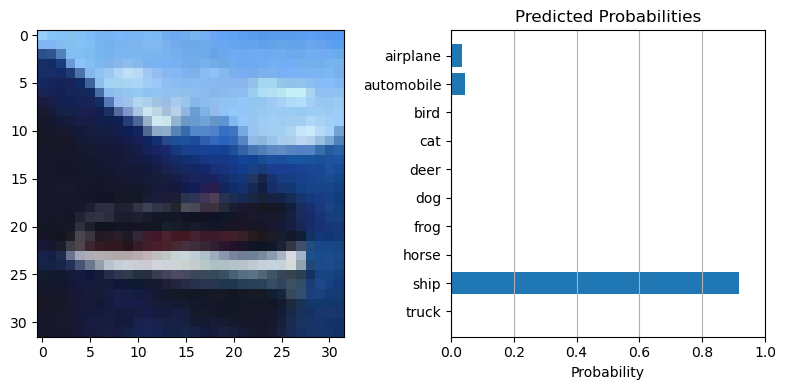

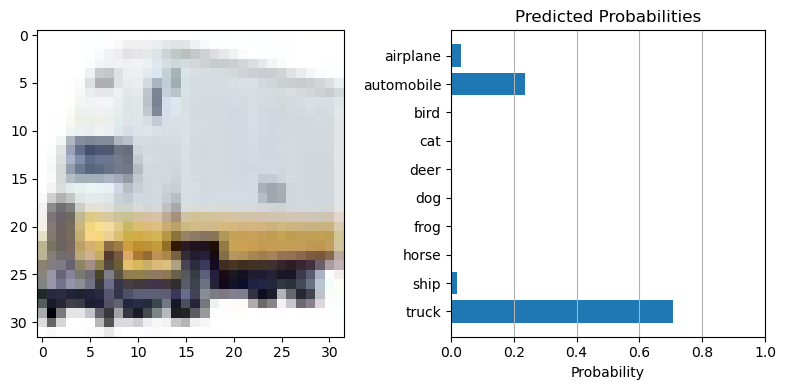

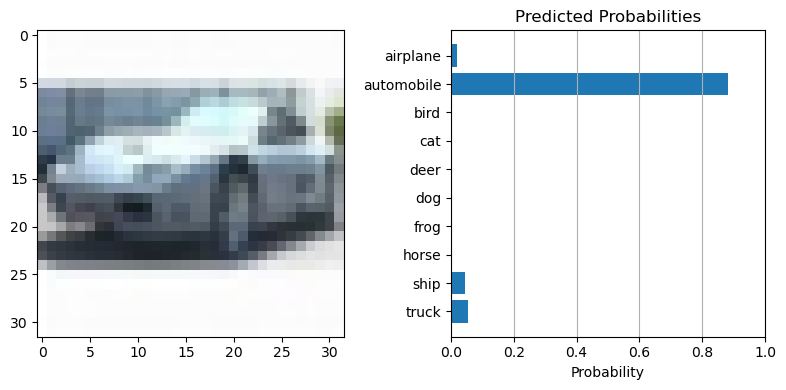

In [10]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

# Modifying the model
---
Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.





In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(K.backend())

tensorflow


Same data as above, images of 32x32x3 size.

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


The model consists of progressively larger filter layers (32 -> 64 -> 128)
1. Batch normalization speeds up and improves model's generalization abilities.
2. pooling gradually downsamples the images (i.e. fewer pizels per image -> model looks for more generic features in that image).
3. Dropping 30%/50% neurons after each layer improves generalization abilities.

In [5]:
# Create the model
inputs = keras.Input(shape=input_shape)

# ---------------
x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.3)(x)
# ---------------

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = layers.Flatten()(x)

x = keras.layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")


W0000 00:00:1762114059.399030   50617 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1762114059.403318   50617 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1762114059.588976   50617 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


In [6]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,426 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Two callbacks are added, one to reduce learning rate upon reaching plateau and second to stop the model after it stops improving. Batch size 128 was chosen as a good balance between performance and model accuracy.

In [7]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ReduceLROnPlateau

# increased batch size and epochs to make processing faster and more reliable
batch_size = 64
epochs = 250

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/250


I0000 00:00:1762114073.321909   51056 service.cc:158] XLA service 0x7ee2fc043730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762114073.321946   51056 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1762114073.360540   51056 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762114073.674720   51056 cuda_dnn.cc:463] Loaded cuDNN version 91002


 48/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1593 - loss: 2.6397

I0000 00:00:1762114077.646537   51056 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4119 - loss: 1.6283 - val_accuracy: 0.5076 - val_loss: 1.3091 - learning_rate: 0.0020
Epoch 2/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5733 - loss: 1.1906 - val_accuracy: 0.6136 - val_loss: 1.0946 - learning_rate: 0.0020
Epoch 3/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6309 - loss: 1.0419 - val_accuracy: 0.6649 - val_loss: 0.9305 - learning_rate: 0.0020
Epoch 4/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6691 - loss: 0.9453 - val_accuracy: 0.7227 - val_loss: 0.7764 - learning_rate: 0.0020
Epoch 5/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6923 - loss: 0.8752 - val_accuracy: 0.6640 - val_loss: 0.9641 - learning_rate: 0.0020
Epoch 6/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7150 - loss: 0.8206 - val_accuracy: 0.7349 - val_loss: 0.7566 - learning_rate: 0.0020
Epoch 7/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7297 - loss: 0.7791 - val_a

Training and validation accuracy & training and validation loss. The lines converge and eventually plateau around 50-60 epocs.

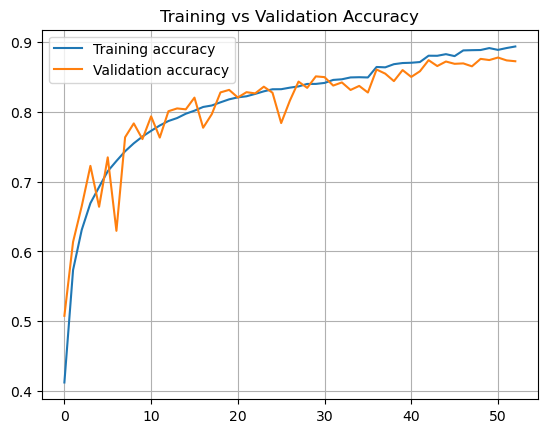

In [8]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

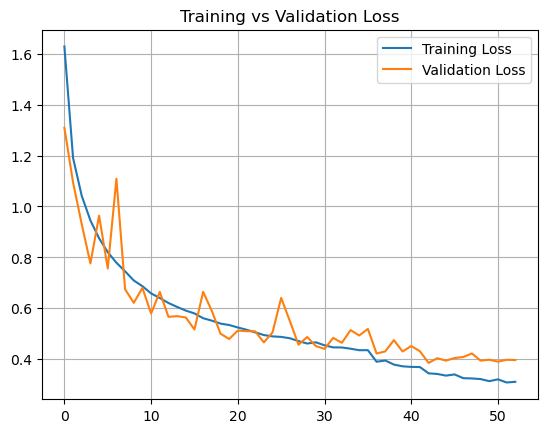

In [9]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

Final accuracy & loss scores.

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.3998599648475647
Test accuracy: 0.867900013923645
Final training accuracy: 0.893975019454956
Final training loss: 0.31154313683509827
Final validation accuracy: 0.8727999925613403
Final validation loss: 0.39702391624450684


Sample image predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


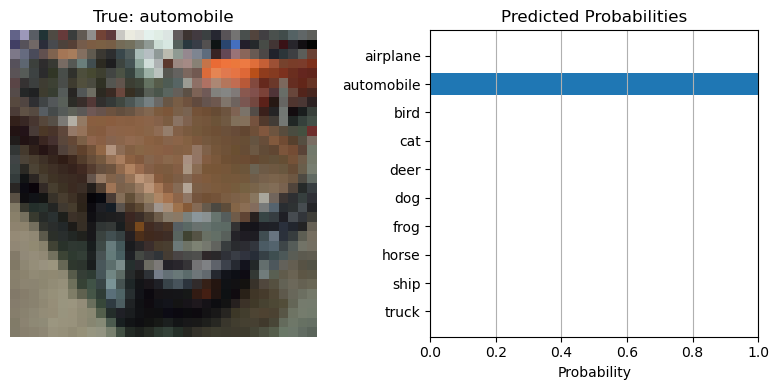

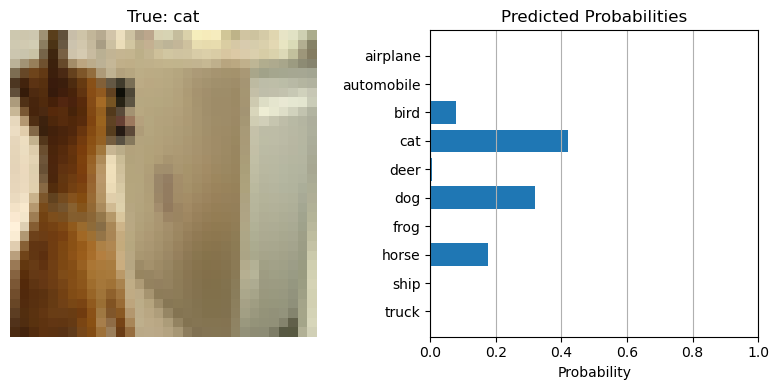

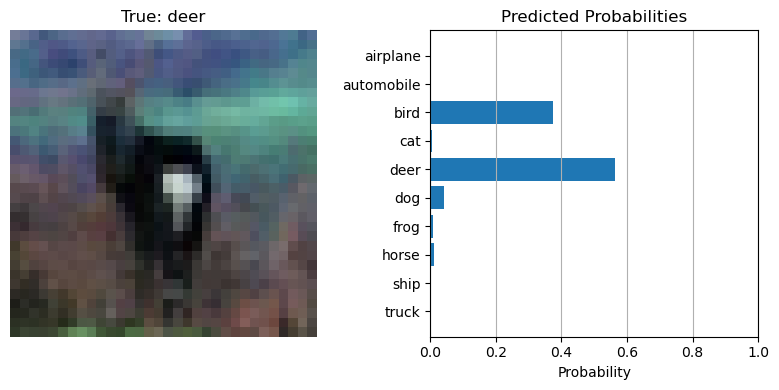

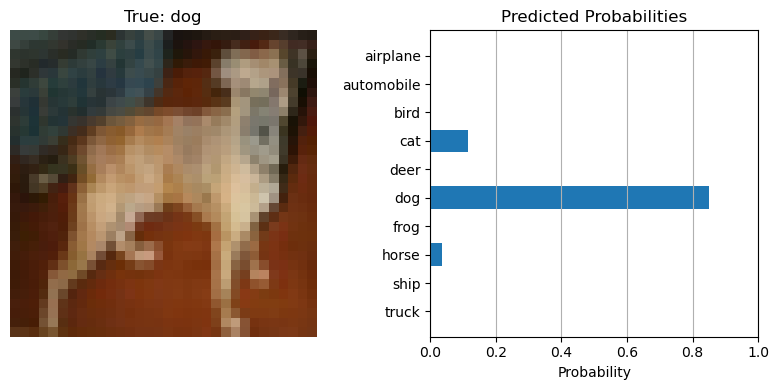

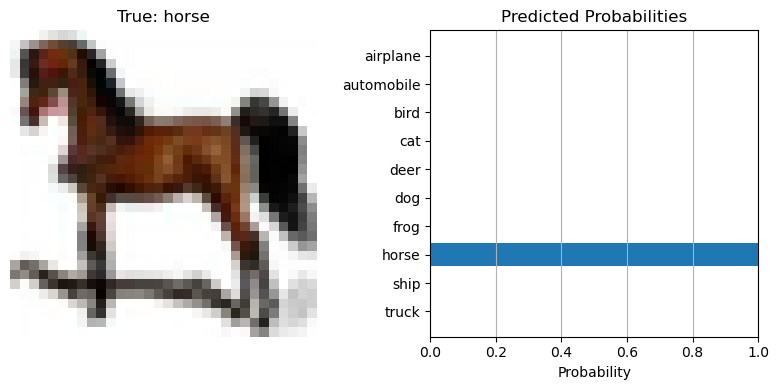

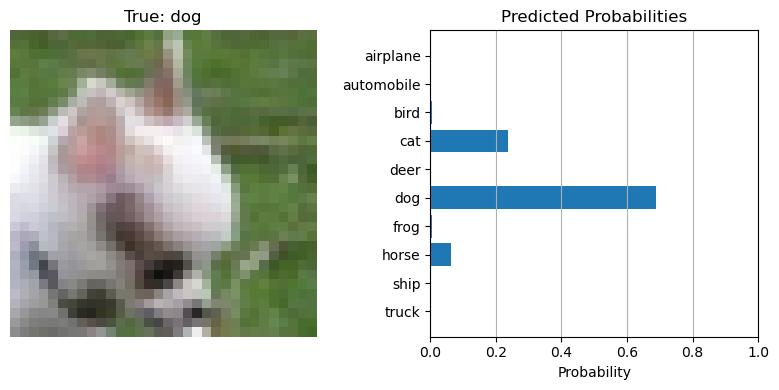

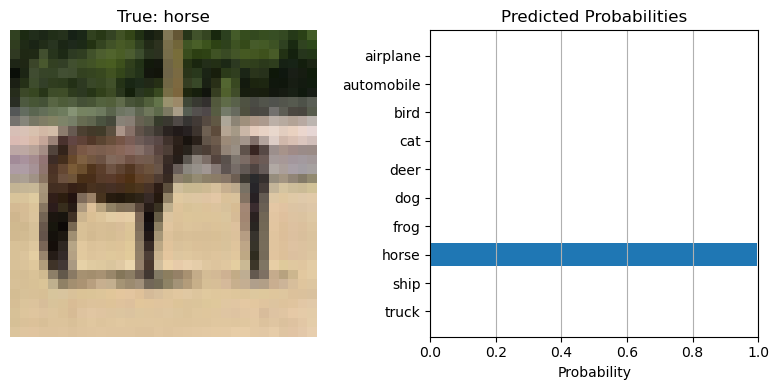

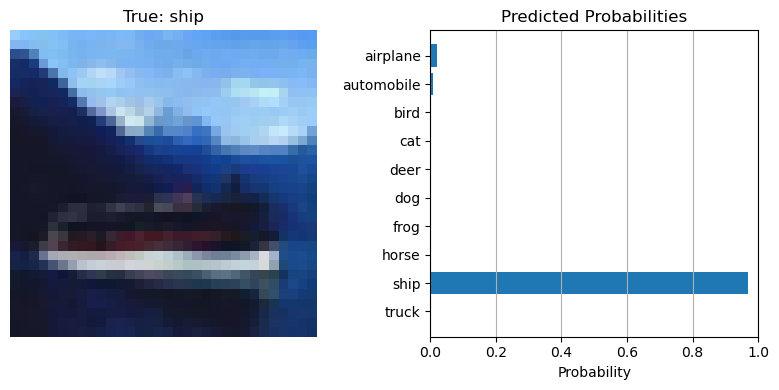

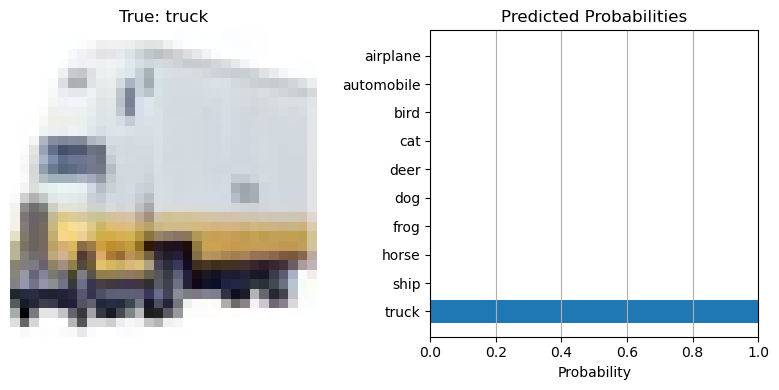

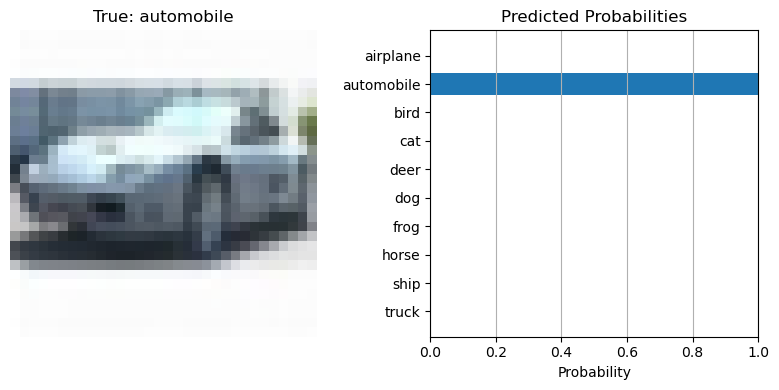

In [11]:
import numpy as np
import matplotlib.pyplot as plt

start = 2000
subset = x_test[start:start+10].astype("float32")

y = model.predict(subset, batch_size=10)

for k in range(10):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(subset[k].reshape((32, 32, 3)))
    plt.axis("off")
    plt.title(f"True: {targets[np.argmax(y[k])]}")

    ind = np.arange(len(targets))
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[k].flatten())
    plt.yticks(ind, targets)
    plt.gca().invert_yaxis()
    plt.xlabel("Probability")
    plt.title("Predicted Probabilities")
    plt.xlim(0, 1)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
    plt.close('all')



In [20]:
model.save('./mnist_cnn.keras')


In [21]:
model = keras.models.load_model('mnist_cnn.keras')
